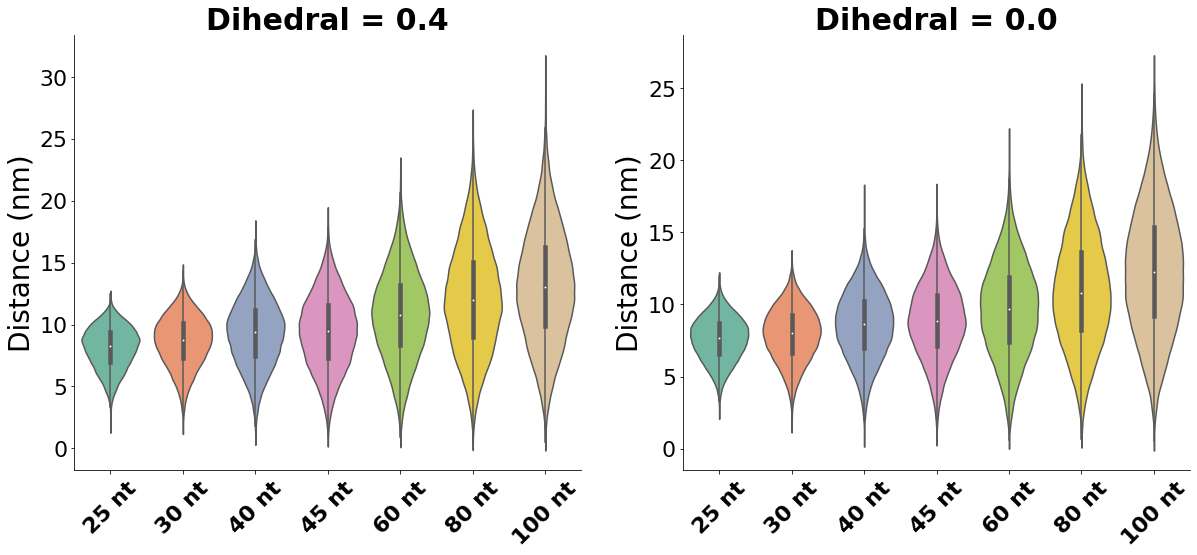

In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


list = [25, 30, 40, 45, 60, 80, 100]
length = ['25 nt', '30 nt', '40 nt', '45 nt', '60 nt', '80 nt', '100 nt']

xtick_pos = np.array([0, 1, 2, 3, 4, 5, 6])
cmap = sns.color_palette("Set2")

data0_0, median_dna_0, std_dna_0 =[], [], []
data0_4, median_dna_4, std_dna_4 =[], [], []

for ll in list:
    name_0="/trajectories/gargi/RPA_Ed/RESULTS.ANALYSIS/end_to_end_"+str(ll)+"_dih_0.0_bond_hst.txt"
    name_4="/trajectories/gargi/RPA_Ed/RESULTS.ANALYSIS/end_to_end_"+str(ll)+"_dih_0.4_bond_hst.txt"
    data_0 = np.loadtxt(name_0) 
    data_4 = np.loadtxt(name_4)
    mask = np.isnan(data_0)
    data_n0 = data_0[~mask]
    maskp = np.isnan(data_4)
    data_n4 = data_4[~maskp]
    dt_0 =data_n0/10 
    dt_4 = data_n4/10
    me0, me4 =np.mean(dt_0), np.mean(dt_4)
    sd0, sd4 =np.std(dt_0), np.mean(dt_4)
    median_dna_0.append(me0)
    std_dna_0.append(sd0)
    data0_0.append(dt_0)
    median_dna_4.append(me4)
    std_dna_4.append(sd4)
    data0_4.append(dt_4)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    
sns.violinplot(data=data0_4, width=0.8, ax=ax[0], palette=cmap, split=True, scale="width")
sns.violinplot(data=data0_0, width=0.8, ax=ax[1], palette=cmap, split=True, scale="width")

ax[0].set_title('Dihedral = 0.4', fontsize=30, fontweight='bold')
ax[1].set_title('Dihedral = 0.0', fontsize=30, fontweight='bold')
for axp in ax:
 axp.set_xticks(xtick_pos, length, fontsize=24, fontweight='bold', rotation=45)
 axp.set_ylabel('Distance (nm)', fontsize=28)
 axp.xaxis.tick_bottom()
 axp.yaxis.tick_left()
 axp.tick_params(axis='both', which='major', labelsize=22)

 spines_to_keep = ['bottom', 'left']
 spines_to_remove = ['top', 'right']

 for spine in spines_to_remove:
   axp.spines[spine].set_visible(False)
   
fig.savefig('length_vs_distance_violin_hst.png', dpi=300, bbox_inches='tight')

In [2]:
np.savetxt('dna_c_hst_med_val_0.txt', median_dna_0, fmt='%8.3f')
np.savetxt('dna_c_hst_med_val_4.txt', median_dna_4, fmt='%8.3f')
np.savetxt('dna_c_hst_std_val_0.txt', std_dna_0, fmt='%8.3f')
np.savetxt('dna_c_hst_std_val_4.txt', std_dna_4, fmt='%8.3f')

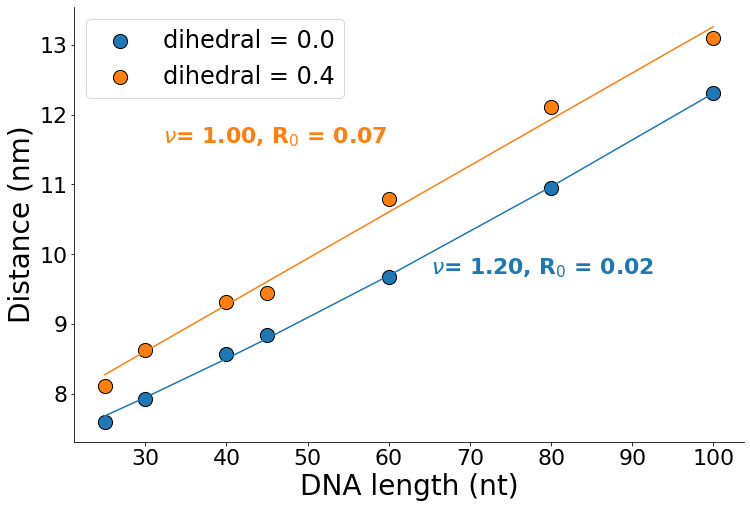

In [4]:
fig, axp = plt.subplots(figsize=(12,8))
length = [25, 30, 40, 45, 60, 80, 100]
length5s = [30, 40, 45, 60, 80, 100]

from scipy.optimize import curve_fit
def scaling_law(x, A, v):
    return 6.6+A * x**v

axp.scatter(length, median_dna_0, s=200, edgecolor='black', label='dihedral = 0.0')
axp.scatter(length, median_dna_4, s=200, edgecolor='black', label='dihedral = 0.4')

params0, covar0 = curve_fit(scaling_law, length, median_dna_0)
params4, covar4 = curve_fit(scaling_law, length, median_dna_4)

A0, v0 = params0
A4, v4 = params4
y_fit0 = scaling_law(length, A0, v0)
y_fit4 = scaling_law(length, A4, v4)

axp.plot(length, y_fit0)
axp.plot(length, y_fit4)
axp.legend(fontsize=24)

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
plt.text(0.7, 0.4, f'$\\nu$= {v0:.2f}, R$_{0}$ = {A0:.2f}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=22, fontweight='bold', color='tab:blue')

plt.text(0.3, 0.7, f'$\\nu$= {v4:.2f}, R$_{0}$ = {A4:.2f}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=22, fontweight='bold', color='tab:orange')

   
fig.savefig('length_vs_distance_violin_constrained_dna_hst.png', dpi=300, bbox_inches='tight')

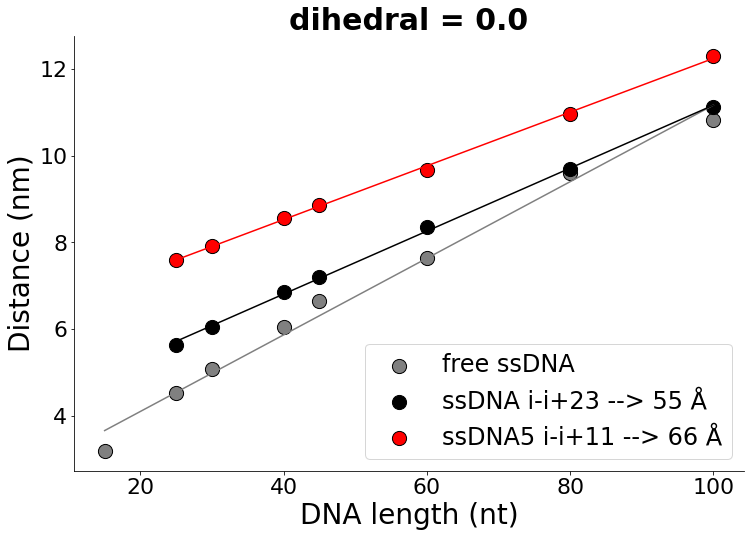

In [21]:
data_dna = np.loadtxt('dna_med_val_0.txt')
data_dna_c = np.loadtxt('dna_c_med_val_0.txt')
data_dna_c_h = np.loadtxt('dna_c_hst_med_val_0.txt')

fig, axp = plt.subplots(figsize=(12,8))

length_m = [25, 30, 40, 45, 60, 80, 100]
length = [15, 25, 30, 40, 45, 60, 80, 100]
length_m5 = [30, 40, 45, 60, 80, 100]

axp.scatter(length, data_dna, label = 'free ssDNA', color='gray', s=200, edgecolor='black')
axp.scatter(length_m, data_dna_c, label='ssDNA i-i+23 --> 55 \u212B', color='black', s=200, edgecolor='black')
axp.scatter(length_m, data_dna_c_h, label='ssDNA5 i-i+11 --> 66 \u212B', color='red', s=200, edgecolor='black')

axp.legend(fontsize=24)

axp.set_title('dihedral = 0.0', fontsize=30, fontweight='bold')
axp.set_ylabel('Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
coefficients_d = np.polyfit(length, data_dna, 1)
fitted_line_d = np.polyval(coefficients_d, length)

coefficients_r = np.polyfit(length_m, data_dna_c, 1)
fitted_line_r = np.polyval(coefficients_r, length_m)

coefficients_r_hs = np.polyfit(length_m, data_dna_c_h, 1)
fitted_line_r_hs = np.polyval(coefficients_r_hs, length_m)

axp.plot(length, fitted_line_d, color='gray')
axp.plot(length_m, fitted_line_r, color='black')
axp.plot(length_m, fitted_line_r_hs, color='red')